Data Preprocessing

In [3]:
#importing libraries 
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
pip install chart_studio

     |████████████████████████████████| 71kB 4.6MB/s 


In [4]:
#Loading the Dataset
data = pd.read_csv('sea-level-rise.csv', sep=',')
data.head() 

,Year,Lower Error Bound,Upper Error Bound,CSIRO Adjusted Sea Level,Sea Level Moving Average
0,1880,-0.952756,0.952756,0.000000,0.000000
1,1881,-0.732283,1.173228,0.220472,0.000000
2,1882,-1.346457,0.464567,-0.440945,0.000000
3,1883,-1.129921,0.665354,-0.232283,0.000000
4,1884,-0.283465,1.464567,0.590551,0.027559


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#basic info abt data
data.head(10)

,Year,Lower Error Bound,Upper Error Bound,CSIRO Adjusted Sea Level,Sea Level Moving Average
0,1880,-0.952756,0.952756,0.000000,0.000000
1,1881,-0.732283,1.173228,0.220472,0.000000
2,1882,-1.346457,0.464567,-0.440945,0.000000
3,1883,-1.129921,0.665354,-0.232283,0.000000
4,1884,-0.283465,1.464567,0.590551,0.027559
5,1885,-0.330709,1.393701,0.531496,0.133858
6,1886,-0.381890,1.255906,0.437008,0.177165
7,1887,-0.602362,1.035433,0.216535,0.308661
8,1888,-0.519685,1.118110,0.299213,0.414961
9,1889,-0.456693,1.181102,0.362205,0.369291


In [7]:
# to check data-type and null values in all columns
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      135 non-null    int64  
 1   Lower Error Bound         134 non-null    float64
 2   Upper Error Bound         134 non-null    float64
 3   CSIRO Adjusted Sea Level  134 non-null    float64
 4   Sea Level Moving Average  135 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [8]:
#to find out mean,median , max values of each column
data.describe() 

,Year,Lower Error Bound,Upper Error Bound,CSIRO Adjusted Sea Level,Sea Level Moving Average
count,135.000000,134.000000,134.000000,134.000000,135.000000
mean,1947.000000,3.204666,4.096016,3.650341,3.556541
std,39.115214,2.663781,2.312581,2.485692,2.461395
min,1880.000000,-1.346457,0.464567,-0.440945,0.000000
25%,1913.500000,1.078740,2.240157,1.632874,1.485827
50%,1947.000000,2.915354,3.710630,3.312992,3.105512
75%,1980.500000,5.329724,5.845472,5.587598,5.509449
max,2014.000000,8.992126,9.661417,9.326772,9.043307


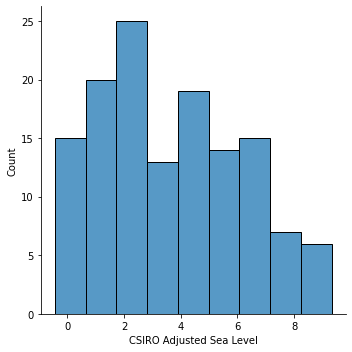

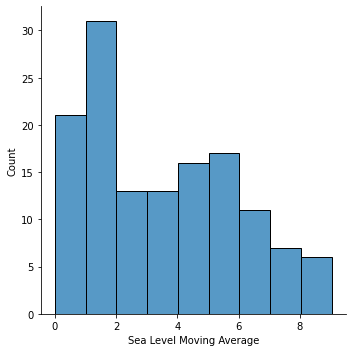

In [9]:
#Data Visualization - distribution of data
sns.displot(data, x="CSIRO Adjusted Sea Level")
sns.displot(data,x='Sea Level Moving Average')

In [10]:
#Converting columns to numpy arrays for plotting line plots
#CSIRO Sea levelCOLUMN
#for sea level column without mov avg 
cs_sea_level_array =data['CSIRO Adjusted Sea Level'].to_numpy()
#prepare array data for moving average for 5 years
sea_level_mavg_5years=data['Sea Level Moving Average'].to_numpy()
#prepare array data for years column
years_array=data['Year'].to_numpy()

#plot graph for Sea level col no mov avg

CSIRO_Sea_Level=cs_sea_level_array[:]
x= years_array #years
#Plotting sea level readings Line plot
sea_level_plot = px.scatter(x=x, y=CSIRO_Sea_Level,trendline='lowess')
# Edit the layout
sea_level_plot.update_layout(title='CSIRO_Sea_Level(No Smoothening)',
                   xaxis_title='Years',
                   yaxis_title='CSIRO_Sea_Level')
sea_level_plot.show()

In [11]:
#Moving average plot for sea level  rise readings
#prepare array data for moving average for 5 years
sea_level_mavg_5years=data['Sea Level Moving Average'].to_numpy()
#prepare array data for years column
years_array=data['Year'].to_numpy()
#plot graph for Sea level col with moving avg for 5 years

Smooth_Sea_Level=sea_level_mavg_5years[:]
#years array
x= years_array 
#Plotting sea level readings Line plot -Smoothened
sea_level_smooth = px.scatter(x=x, y=Smooth_Sea_Level,trendline='lowess')
# Edit the layout
sea_level_smooth.update_layout(title='CSIRO_Sea_Level(Smoothened Plot)',
                   xaxis_title='Years',
                   yaxis_title='Sea_Level(Moving Average-5 years)')
sea_level_smooth.show()


# Linear Regression and Polynomial Regression 

In [12]:
# Linear Regression
#Loading the Dataset
data = pd.read_csv('sea-level-rise.csv', sep=',')
data=data.dropna(axis=0)
print(data.head(10))
X = data.iloc[:,:-2].values
y = data.iloc[:, -1].values


   Year  Lower Error Bound  ...  CSIRO Adjusted Sea Level  Sea Level Moving Average
0  1880          -0.952756  ...                  0.000000                  0.000000
1  1881          -0.732283  ...                  0.220472                  0.000000
2  1882          -1.346457  ...                 -0.440945                  0.000000
3  1883          -1.129921  ...                 -0.232283                  0.000000
4  1884          -0.283465  ...                  0.590551                  0.027559
5  1885          -0.330709  ...                  0.531496                  0.133858
6  1886          -0.381890  ...                  0.437008                  0.177165
7  1887          -0.602362  ...                  0.216535                  0.308661
8  1888          -0.519685  ...                  0.299213                  0.414961
9  1889          -0.456693  ...                  0.362205                  0.369291

[10 rows x 5 columns]


In [13]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
pred_lr=lin_reg.predict(X)

In [14]:
# Visualising the Linear Regression results 

#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py
#prepare array data for years column
years_array=data['Year'].to_numpy()
# predicted values of SLR using Linear Regression
x=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034]
slr_LR=pred_lr[:20]
#Plotting readings
Predicted_SLR_LR= px.scatter(x=x, y=slr_LR,trendline='ols')
# Edit the layout
Predicted_SLR_LR.update_layout(title='Predicted Sea Level Rise - Linear Regression',
                   xaxis_title='Years',
                   yaxis_title='Sea level rise (metres)')
Predicted_SLR_LR.show()

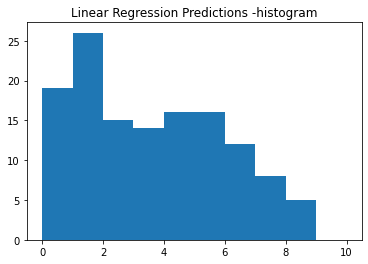

In [27]:
#visualizing predictions data distribution
   
slr_LR_Pred= np.array([-0.08209525,  0.09059494, -0.37320724, -0.21436698,  0.35196583, 0.32523734,  0.25116825,  0.12298469,  0.20165183,  0.26688712,
        0.33997248,  0.31655746,  0.42477471,  0.56170593,  0.36102135,0.70026667,  0.50677402,  0.65713711,  0.90006001,  1.11510508,0.9604448 ,  0.95168479,  1.08882504,  1.31730197,  1.05996348,
        0.8910352 ,  1.07569404,  1.06612894,  1.00964132,  1.15567682,1.17524376,  1.40888441,  1.34786016,  1.41557279,  1.59838138,1.82706734,  1.78090714,  1.67648287,  1.65285881,  1.7180941 ,
        1.78395648,  1.86551903,  1.86649039,  1.91518938,  1.74423288,1.83469068,  2.03445364,  2.00399361,  1.90410596,  1.95817768,2.08499051,  2.10228914,  2.2689795 ,  2.40385144,  2.28393603,
        2.45662623,  2.3712156 ,  2.54659217,  2.63869118,  2.8122175 ,2.6602436 ,  3.00154819,  3.0238015 ,  3.04605482,  2.89348487,2.99095663,  3.2117925 ,  3.28836932,  3.43088232,  3.39215414,
        3.45903063,  3.73359397,  3.68310618,  3.8177691 ,  3.75632679,3.79696665,  3.67931955,  4.05865142,  4.10982774,  4.13724477,
        4.26178929,  4.45059772,  4.33315965,  4.312431  ,  4.12535627,4.44848335,  4.32277712,  4.37974426,  4.42927937,  4.64289225,
        4.61410449,  4.77315379,  5.03986703,  4.89804257,  5.23997426,5.21635021,  5.2146352 ,  5.18542937,  5.38250595,  5.273127  ,
        5.45077188,  5.80613543,  5.66678831,  5.92048775,  5.91277291,5.65832982,  5.69670137,  5.73217752,  5.88358577,  6.02962127,
        6.10870648,  6.20080549,  6.24207245,  6.21865743,  6.38328851,6.48613301,  6.62390036,  6.83688615,  6.59092025,  6.85246978,
        6.90675054,  7.0792317 ,  7.16885337,  7.45189389,  7.46071534,7.48275963,  7.62321335,  7.70788034,  7.963221  ,  8.14955209,
        8.39250604,  8.47221835,  8.76478122,  8.56800616])

plt.hist(slr_LR_Pred, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Linear Regression Predictions -histogram") 
plt.show()

In [16]:
#Degree 3 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
lin_reg_2_pred=lin_reg_2.predict(X_poly)

In [17]:
# Visualising the Polynomial Regression results
#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py
#prepare array data for years column
years_array=data['Year'].to_numpy()
# predicted values of SLR using Polynomial Regression
x=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034]
slr_PR=lin_reg_2_pred[:20]
#Plotting readings
Predicted_SLR_PR= px.scatter(x=x, y=slr_PR,trendline='ols')
# Edit the layout
Predicted_SLR_PR.update_layout(title='Predicted Sea Level Rise - Poly Regression(degree=3)',
                   xaxis_title='Years',
                   yaxis_title='Sea level rise (metres)')
Predicted_SLR_PR.show()

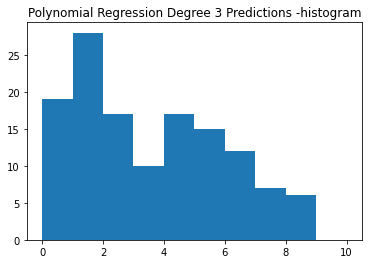

In [29]:
#visualizing predictions data distribution-poly reg degree 3 
   
slr_PR3_Pred= np.array([-7.47191519e-02, -4.96087824e-02, -8.98083672e-03,  2.01893817e-02,8.51820256e-02,  1.71416118e-01,  2.87275092e-01,  2.61295729e-01,
        3.04248001e-01,  3.40152686e-01,  3.86575621e-01,  3.81807251e-01,4.36727283e-01,  5.32427833e-01,  4.97911442e-01,  5.34678563e-01,
        5.57680441e-01,  5.88973403e-01,  7.51266438e-01,  8.43470361e-01,9.29048271e-01,  9.95469348e-01,  1.09182807e+00,  1.14864969e+00,
        1.11242888e+00,  1.07862718e+00,  1.25043084e+00,  1.23723277e+00, 1.18537171e+00,  1.30731391e+00,  1.30937521e+00,  1.51167781e+00,
        1.46241868e+00,  1.51535295e+00,  1.66205120e+00,  1.75334287e+00,1.77821274e+00,  1.75348251e+00,  1.73728805e+00,  1.78852944e+00,
        1.82051324e+00,  1.87102446e+00,  1.84406020e+00,  1.88944128e+00,1.73562064e+00,  1.76634966e+00,  1.86862367e+00,  1.92365406e+00,
        1.91943922e+00,  1.97374962e+00,  2.05803521e+00,  2.07783390e+00,2.19161523e+00,  2.29336528e+00,  2.23924975e+00,  2.32293707e+00,
        2.34377722e+00,  2.40712152e+00,  2.46112541e+00,  2.50235875e+00,2.58404267e+00,  2.81291506e+00,  2.82182535e+00,  2.83454415e+00,
        2.81354421e+00,  2.86644556e+00,  2.97352434e+00,  3.16505978e+00,3.31028337e+00,  3.38656185e+00,  3.48545946e+00,  3.67546770e+00,
        3.68262477e+00,  3.79265634e+00,  3.79634095e+00,  3.85714374e+00,3.81301852e+00,  4.06809237e+00,  4.14006588e+00,  4.19709282e+00,
        4.28507316e+00,  4.38244886e+00,  4.38873860e+00,  4.40275189e+00,4.32488108e+00,  4.51339669e+00,  4.48735123e+00,  4.56069799e+00,
        4.58945318e+00,  4.65478063e+00,  4.67757605e+00,  4.78725841e+00,4.95425136e+00,  4.91970210e+00,  5.12667059e+00,  5.15249302e+00,
        5.14959125e+00,  5.20694420e+00,  5.30717579e+00,  5.29611412e+00,5.43915752e+00,  5.65769233e+00,  5.65061452e+00,  5.77208328e+00,
        5.83980201e+00,  5.76916011e+00,  5.83887431e+00,  5.93259219e+00,5.98324493e+00,  6.04715718e+00,  6.08187446e+00,  6.16174226e+00,
        6.21560658e+00,  6.30555633e+00,  6.37718568e+00,  6.46334202e+00,6.56251961e+00,  6.71156175e+00,  6.72248497e+00,  6.78695789e+00,
        6.89248788e+00,  7.03618852e+00,  7.12764919e+00,  7.34044272e+00,7.40368052e+00,  7.49347096e+00,  7.64745348e+00,  7.73755971e+00,
        8.01092992e+00,  8.18939020e+00,  8.36497895e+00,  8.52570363e+00,8.80065673e+00,  8.98990547e+00])

plt.hist(slr_PR3_Pred, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Polynomial Regression Degree 3 Predictions -histogram") 
plt.show()

In [ ]:
# Visualising the Polynomial Regression results
#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py
#prepare array data for years column
years_array=data['Year'].to_numpy()
# predicted values of SLR using Polynomial Regression
x=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034]
slr_PR=lin_reg_2_pred[:20]
#Plotting readings
Predicted_SLR_PR= px.scatter(x=x, y=slr_PR,trendline='lowess')
# Edit the layout
Predicted_SLR_PR.update_layout(title='Predicted Sea Level Rise - Poly Regression',
                   xaxis_title='Years',
                   yaxis_title='Sea level rise (metres)')
Predicted_SLR_PR.show()

In [30]:
#Degree 2 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_d2 = LinearRegression()
lin_reg_d2.fit(X_poly, y)
lin_reg_d2_pred=lin_reg_d2.predict(X_poly)

In [31]:
# Visualising the Polynomial Regression results
#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py
#prepare array data for years column
years_array=data['Year'].to_numpy()
# predicted values of SLR using Polynomial Regression
x=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034]
slr_PR_2=lin_reg_d2_pred[:20]
#Plotting readings
Predicted_SLR_PR_2= px.scatter(x=x, y=slr_PR_2,trendline='ols')
# Edit the layout
Predicted_SLR_PR_2.update_layout(title='Predicted Sea Level Rise - Poly Regression(degree=2)',
                   xaxis_title='Years',
                   yaxis_title='Sea level rise (metres)')
Predicted_SLR_PR_2.show()

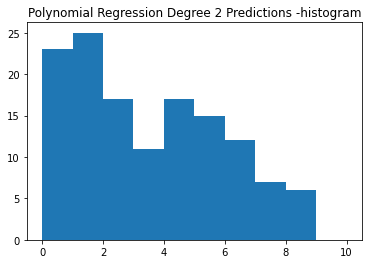

In [33]:
#visualizing predictions data distribution-poly reg degree 2
   
slr_PR2_Pred= np.array([0.024425  ,  0.09866126, -0.04545936,  0.02434687,  0.27085742,0.27687152,  0.30695847,  0.25723821,  0.29283902,  0.32384834,
        0.36379524,  0.36027449,  0.41073522,  0.49279236,  0.37766731,0.52271649,  0.46657197,  0.54765297,  0.701169  ,  0.81895015,0.8260077 ,  0.88071752,  0.97189658,  1.10890113,  0.99959893,
        1.07660551,  1.24653993,  1.21523921,  1.23662206,  1.29229187,1.30162465,  1.46231122,  1.43243199,  1.47780481,  1.60486482,
        1.74596422,  1.80093004,  1.7737703 ,  1.77501608,  1.80800884,1.80426722,  1.83589945,  1.82909397,  1.8808842 ,  1.79310516,
        1.79459129,  1.89060475,  1.9625228 ,  1.98644854,  2.04268749,2.12373978,  2.11943101,  2.24296798,  2.33080185,  2.27031879,
        2.36714544,  2.34655309,  2.44599644,  2.50518616,  2.57103478,2.61120656,  2.83273046,  2.8561807 ,  2.88051891,  2.82483567,
        2.88974217,  3.03028396,  3.19320558,  3.31949199,  3.42434264,3.54121663,  3.72327517,  3.7160823 ,  3.83281282,  3.8343251 ,
        3.89645355,  3.8520808 ,  4.10000913,  4.18497366,  4.22581199,4.29658094,  4.42337933,  4.36225141,  4.36223166,  4.25258162,
        4.45896222,  4.41233715,  4.47492814,  4.49718983,  4.60809957, 4.61093202,  4.73683774,  4.91969174,  4.86470936,  5.09639106,
        5.11364315,  5.12514408,  5.15042233,  5.28640027,  5.24420047,5.3974077 ,  5.64786782,  5.60274206,  5.7730941 ,  5.81249878,
        5.67960442,  5.73274426,  5.79262016,  5.90973399,  6.02556388,6.09447773,  6.18620012,  6.2408571 ,  6.2618574 ,  6.40176268,
        6.50395285,  6.62959124,  6.80583706,  6.67839973,  6.88238124,6.96175345,  7.11878985,  7.21633501,  7.44496853,  7.49366876,7.55436455,  
        7.69336142,  7.79099101,  8.01679203,  8.19134418,8.40820045,  8.51065495,  8.77979205,  8.70971933])

plt.hist(slr_PR2_Pred, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Polynomial Regression Degree 2 Predictions -histogram") 
plt.show()

In [34]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg.fit_transform(X)
lin_reg_d4 = LinearRegression()
lin_reg_d4.fit(X_poly, y)
lin_reg_d4_pred=lin_reg_d4.predict(X_poly)

In [35]:
# Visualising the Polynomial Regression results
#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py
#prepare array data for years column
years_array=data['Year'].to_numpy()
# predicted values of SLR using Polynomial Regression
x=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034]
slr_PR_4=lin_reg_d4_pred[:20]
#Plotting readings
Predicted_SLR_PR_4= px.scatter(x=x, y=slr_PR_4,trendline='ols')
# Edit the layout
Predicted_SLR_PR_4.update_layout(title='Predicted Sea Level Rise - Poly Regression(degree=4)',
                   xaxis_title='Years',
                   yaxis_title='Sea level rise (metres)')
Predicted_SLR_PR_4.show()

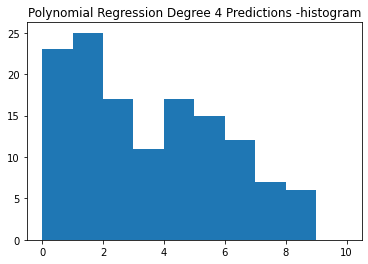

In [38]:
#visualizing predictions data distribution-poly reg degree 4
slr_PR4_Pred= np.array([ 0.024425  ,  0.09866126, -0.04545936,  0.02434687,  0.27085742,0.27687152,  0.30695847,  0.25723821, 
                                0.29283902,  0.32384834,0.36379524,  0.36027449,  0.41073522, 0.49279236,  0.37766731,0.52271649, 
                                0.46657197,  0.54765297,  0.701169  ,  0.81895015,0.8260077 ,  0.88071752,  0.97189658,  1.10890113, 
                                0.99959893,1.07660551,  1.24653993,  1.21523921,  1.23662206,  1.29229187, 1.30162465,  1.46231122,  
                                1.43243199,  1.47780481,  1.60486482,1.74596422,  1.80093004,  1.7737703 ,  1.77501608,  1.80800884,
        1.80426722,  1.83589945,  1.82909397,  1.8808842 ,  1.79310516,1.79459129,  1.89060475,  1.9625228 ,  1.98644854,  2.04268749,
        2.12373978,  2.11943101,  2.24296798,  2.33080185,  2.27031879,2.36714544,  2.34655309,  2.44599644,  2.50518616,  2.57103478,
        2.61120656,  2.83273046,  2.8561807 ,  2.88051891,  2.82483567,2.88974217,  3.03028396,  3.19320558,  3.31949199,  3.42434264,
        3.54121663,  3.72327517,  3.7160823 ,  3.83281282,  3.8343251 ,3.89645355,  3.8520808 ,  4.10000913,  4.18497366,  4.22581199,
        4.29658094,  4.42337933,  4.36225141,  4.36223166,  4.25258162,4.45896222,  4.41233715,  4.47492814,  4.49718983,  4.60809957,
        4.61093202,  4.73683774,  4.91969174,  4.86470936,  5.09639106,5.11364315,  5.12514408,  5.15042233,  5.28640027,  5.24420047,
        5.3974077 ,  5.64786782,  5.60274206,  5.7730941 ,  5.81249878,5.67960442,  5.73274426,  5.79262016,  5.90973399,  6.02556388,
        6.09447773,  6.18620012,  6.2408571 ,  6.2618574 ,  6.40176268, 6.50395285,  6.62959124,  6.80583706,  6.67839973,  6.88238124,
        6.96175345,  7.11878985,  7.21633501,  7.44496853,  7.49366876, 7.55436455,  7.69336142,  7.79099101,  8.01679203,  8.19134418,
        8.40820045,  8.51065495,  8.77979205,  8.70971933])

plt.hist(slr_PR4_Pred, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Polynomial Regression Degree 4 Predictions -histogram") 
plt.show()